## About

This page showcases the work of [Gilbert Fontana](https://www.linkedin.com/in/gilbertfontana/), initially published in the [Visual Capitalist](https://www.visualcapitalist.com/cp/charting-the-global-decline-in-consumer-confidence/).

This plot is a [small multiple line chart](https://www.data-to-viz.com/graph/line.html). It shows the evolution of a metric (the consumer confidence around the world) in the last few years. Each item of the small multiple provides the evolution of a specific country.

Interestingly, all other countries are displayed too, but **nicely faded out**. As a retult, the evolution of the target country is obvious, and it’s possible to **put it in perspective** with other countries.

The chart was originally made with [R](https://r-graph-gallery.com). This post is a translation to Python by [Joseph B.](https://www.linkedin.com/in/joseph-barbier-4ab531224/). 

Thanks to him for accepting sharing his work here!

Let's see what the final picture will look like:

IMAGE

## Libraries

First, you need to install the following librairies:
- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for creating the chart and add customization features
- `pandas` is used to put the data into a dataframe
- `datetime` is used for dealing with the date format of our time variable

And that's it!

In [136]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import datetime

## Dataset

For this reproduction, we're going to retrieve the data directly from the [gallery's](https://python-graph-gallery.com) Github repo. This means we just need to **give the right url as an argument** to pandas' `read_csv()` function to retrieve the data.

Next, we use the `melt()` function to switch **from one country per column** to a **single column with concatenated countries**, while keeping the values in the original `Time` variable. 

In [153]:
# Open the dataset from Github
url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/dataConsumerConfidence.csv"
df = pd.read_csv(url)

# Reshape the DataFrame using pivot longer
df = df.melt(id_vars=['Time'], var_name='country', value_name='value')

# Convert to time format
df['Time'] = pd.to_datetime(df['Time'], format='%b-%Y')

# Remove rows with missing values (only one row)
df = df.dropna()

HTTPError: HTTP Error 404: Not Found

## Basic 3x3 line chart with small multiples

We'll start by creating a "simple" graph, with little customization in order to be progressive. Since the final graph is a **3x3 graph**, we initialize the sub-graphs with 3 rows and 3 columns. Then, on each sub-plot, we display **the same line graph** but with different colors.

Only the country of interest will have a fixed color: *black*. To do this, we iterate over all the distinct categories in the `df['country']` variable.

To get a different color for each sub-graph, we use [matplotlib](https://python-graph-gallery.com/matplotlib/)'s `tab10` color map.

For greater readability, we **remove most axes and labels**. When dealing with small multiples like here, labels on axes can **add confusion** without being really useful. Later on, we'll add a **reference line** to help give visibility without adding too much text.

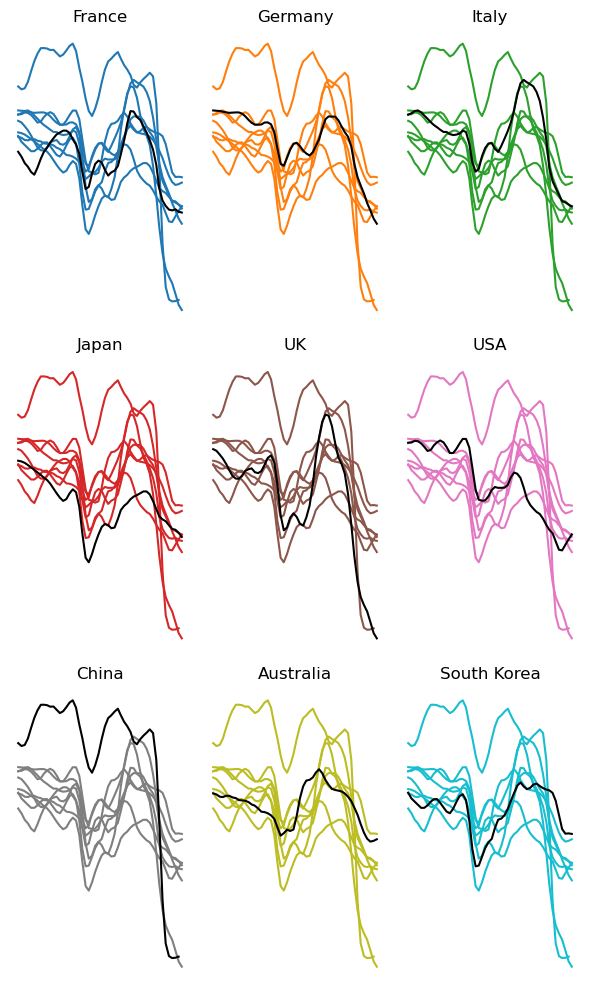

In [147]:
# Create a colormap with a color for each country
num_countries = len(df['country'].unique())
colors = plt.cm.get_cmap('tab10', num_countries)

# Init a 3x3 charts
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(6, 10))

# Plot each group in the subplots
for i, (group, ax) in enumerate(zip(df['country'].unique(), ax.flatten())):

    # Filter for the group
    filtered_df = df[df['country'] == group]
    other_groups = df['country'].unique()[df['country'].unique() != group]
    
    # Plot other groups with lighter colors 
    for other_group in other_groups:

        # Filter observations that are not in the group
        other_y = df['value'][df['country'] == other_group]
        other_x = df['Time'][df['country'] == other_group]

        # Display the other observations with less opacity
        ax.plot(other_x, other_y, color=colors(i))

    # Plot the line of the group
    x = filtered_df['Time']
    y = filtered_df['value']
    ax.plot(x, y, color='black')

    # Removes spines
    ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

    # Remove axis labels
    ax.set_yticks([])
    ax.set_xticks([])
    
    # Add a bold title to each subplot
    ax.set_title(f'{group}', fontsize=12)

# Adjust layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

## Add an opacity parameter and improve style

As you can see, putting the color of the main country in black does not lead to something very beautiful or easy to read. We want something that **showcases the main country** while retaining information from other countries, and the answer to this is `opacity`!.

When we add things in a [matplotlib](https://python-graph-gallery.com/matplotlib/) chart, we can change the `alpha` argument, which is just an opacity argument. In our case, we will just put this parameter lower when plotting the `other_group` line chart, which is actually very easy. 

Also, we change the figure color and background to `seashell` so that the graphics blend in better than on a white background.

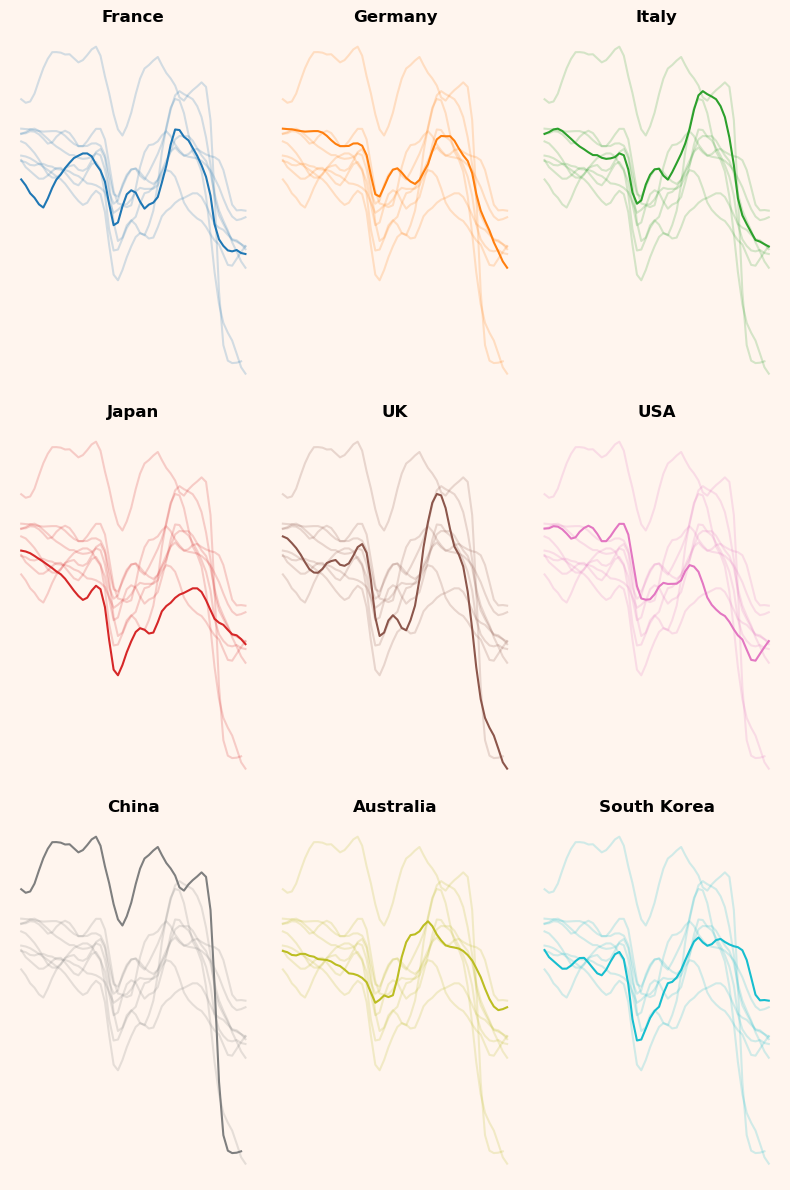

In [152]:
# Create a colormap with a color for each country
num_countries = len(df['country'].unique())
colors = plt.cm.get_cmap('tab10', num_countries)

# Init a 3x3 charts
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8, 12))

# Plot each group in the subplots
for i, (group, ax) in enumerate(zip(df['country'].unique(), ax.flatten())):

    # Filter for the group
    filtered_df = df[df['country'] == group]
    x = filtered_df['Time']
    y = filtered_df['value']

    # Set the background color for each subplot
    ax.set_facecolor('seashell')
    fig.set_facecolor('seashell')
    
    # Plot the line
    ax.plot(x, y, color=colors(i))
    
    # Plot other groups with lighter colors (alpha argument)
    other_groups = df['country'].unique()[df['country'].unique() != group]
    for other_group in other_groups:

        # Filter observations that are not in the group
        other_y = df['value'][df['country'] == other_group]
        other_x = df['Time'][df['country'] == other_group]

        # Display the other observations with less opacity (alpha=0.2)
        ax.plot(other_x, other_y, color=colors(i), alpha=0.2)

    # Removes spines
    ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
    
    # Add a bold title to each subplot
    ax.set_title(f'{group}', fontsize=12, fontweight='bold')
    
    # Remove axis labels
    ax.set_yticks([])
    ax.set_xticks([])

# Adjust layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

The graph is starting to look really interesting, and gives us a lot of information about consumer confidence in these countries over time!

## Add annotations

Adding annotations is really what takes **your graphics to the next level**, but it can also be time-consuming. Even if this step adds a lot of lines of code, don't be afraid of it, because **there's nothing complicated** about it!

In our case, here are the annotations we had :
- Reference line at 100
- Title and description of the metric studied
- Point and value of metric at last date
- Credit and data source

We're mainly using `text()` function from [matplotlib](https://python-graph-gallery.com/matplotlib/), which makes it **super-easy to add text** to a graph. 

Technical details: 
- We use `x - pd.Timedelta(days=300)` to place the '100' further to the left (300 days to the left), but as the x-axis is in datetime format, we can't use only integers.
- The position of the reference lines is calculated so that it starts at the first available date and ends at the last available date. To do this, we sort the data frame and obtain the first and last rows.
- The credit positions are determined through **trial and error** (i.e. I tried different positions until I found the right one). 

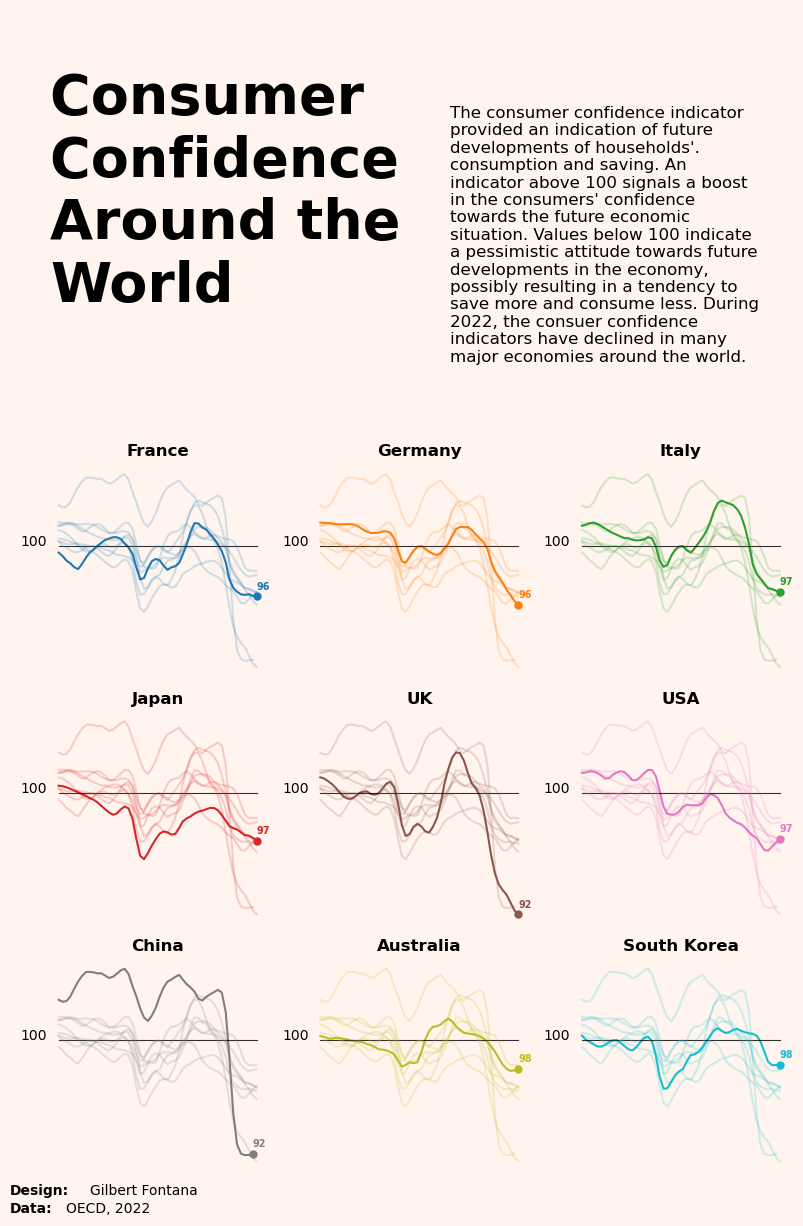

In [139]:
# Create a colormap with a color for each country
num_countries = len(df['country'].unique())
colors = plt.cm.get_cmap('tab10', num_countries)

# Init a 3x3 charts
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8, 12))

# Add a big title on top of the entire chart
fig.suptitle('\nConsumer \nConfidence \nAround the \nWorld\n\n', # Title ('\n' allows you to go to the line),
             fontsize=40,
             fontweight='bold', 
             x=0.05, # Shift the text to the left
             ha='left' # Align the text to the left
            )

# Add a paragraph of text on the right of the title
paragraph_text = (
    "The consumer confidence indicator\n"
    "provided an indication of future\n"
    "developments of households'.\n"
    "consumption and saving. An\n"
    "indicator above 100 signals a boost\n"
    "in the consumers' confidence\n"
    "towards the future economic\n"
    "situation. Values below 100 indicate\n"
    "a pessimistic attitude towards future\n"
    "developments in the economy,\n"
    "possibly resulting in a tendency to\n"
    "save more and consume less. During\n"
    "2022, the consuer confidence\n"
    "indicators have declined in many\n"
    "major economies around the world.\n"
)
fig.text(0.55, 0.9, # Position
         paragraph_text, # Content
         fontsize=12,
         va='top', # Put the paragraph at the top of the chart
         ha='left', # Align the text to the left
        )

# Plot each group in the subplots
for i, (group, ax) in enumerate(zip(df['country'].unique(), ax.flatten())):

    # Filter for the group
    filtered_df = df[df['country'] == group]
    x = filtered_df['Time']
    y = filtered_df['value']

    # Get last value (according to 'Time') for the group
    sorted_df = filtered_df.sort_values(by='Time')
    last_value = sorted_df.iloc[-1]['value']
    last_date = sorted_df.iloc[-1]['Time']

    # Set the background color for each subplot
    ax.set_facecolor('seashell')
    fig.set_facecolor('seashell')
    
    # Plot the line
    ax.plot(x, y, color=colors(i))
    
    # Add the final value
    ax.plot(last_date, # x-axis position
            last_value, # y-axis position
            marker='o', # Style of the point
            markersize=5, # Size of the point
            color=colors(i), # Color
           )
    
    # Add the text of the value
    ax.text(last_date,
             last_value*1.005, # slightly shift up
             f'{round(last_value)}', # round for more lisibility
             fontsize=7,
             color=colors(i), # color
             fontweight='bold',
           )

    # Add the 100 on the left
    ax.text(sorted_df.iloc[0]['Time'] - pd.Timedelta(days=300), # shift the position to the left
             100,
             '100',
             fontsize=10,
             color='black',)

    # Add line 
    sorted_df = df.sort_values(by='Time')
    start_x_position = sorted_df.iloc[0]['Time']
    end_x_position = sorted_df.iloc[-1]['Time']
    ax.plot([start_x_position, end_x_position], # x-axis position
            [100, 100], # y-axis position (constant position)
            color='black', # Color
            alpha=0.8, # Opacity
            linewidth=0.8, # width of the line
           )
    
    # Plot other groups with lighter colors (alpha argument)
    other_groups = df['country'].unique()[df['country'].unique() != group]
    for other_group in other_groups:

        # Filter observations that are not in the group
        other_y = df['value'][df['country'] == other_group]
        other_x = df['Time'][df['country'] == other_group]

        # Display the other observations with less opacity (alpha=0.2)
        ax.plot(other_x, other_y, color=colors(i), alpha=0.2)

    # Removes spines
    ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
    
    # Add a bold title to each subplot
    ax.set_title(f'{group}', fontsize=12, fontweight='bold')
    
    # Remove axis labels
    ax.set_yticks([])
    ax.set_xticks([])

# Add a credit section at the bottom of the chart
fig.text(0.0, -0.01, # position
         "Design:", # text
         fontsize=10,
         va='bottom',
         ha='left',
         fontweight='bold',)
fig.text(0.1, -0.01, # position
         "Gilbert Fontana", # text
         fontsize=10,
         va='bottom',
         ha='left')
fig.text(0.0, -0.025, # position
         "Data:", # text
         fontsize=10,
         va='bottom',
         ha='left',
         fontweight='bold',)
fig.text(0.07, -0.025, # position
         "OECD, 2022",
         fontsize=10,
         va='bottom',
         ha='left')

# Adjust layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
sample_size = 100  # Define the size of the random data samples.
data_group1 = np.random.normal(loc=2, scale=2, size=sample_size) # Generate data points for 'Group 1'
data_group2 = np.random.normal(loc=5, scale=2, size=sample_size) # Generate data points for 'Group 2'
data_combined = np.concatenate([data_group1, data_group2]) # Concatenate the data to create a combined dataset
category_feature = ['Group 1'] * sample_size + ['Group 2'] * sample_size # List that indicates the category for each data point

## Going further

This article explains how to reproduce a [line chart](https://python-graph-gallery.com/line-chart/) with small multiples, originally design by Gilbert Fontana. 

For more examples of **advanced customization**, check out this [other reproduction of Fontana](https://python-graph-gallery.com/web-stacked-line-chart-with-labels/)'s work. Also, you might be interested in [adding an image/logo](https://python-graph-gallery.com/513-add-logo-matplotlib/) to your chart. 